# Установка необходимых библиотек

In [ ]:
pip install ydata_profiling

In [ ]:
pip install optuna

  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.2-py3-none-any.whl.metadata (7.3 kB)
Using cached optuna-4.4.0-py3-none-any.whl (395 kB)
Using cached alembic-1.16.2-py3-none-any.whl (242 kB)


In [ ]:
pip install causalml

  Using cached causalml-0.15.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached forestci-0.6-py3-none-any.whl.metadata (1.3 kB)
  Using cached pathos-0.2.9-py3-none-any.whl.metadata (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached ppft-1.7.7-py3-none-any.whl.metadata (12 kB)
  Using cached pox-0.3.6-py3-none-any.whl.metadata (8.0 kB)
Using cached causalml-0.15.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.5 MB)
Using cached forestci-0.6-py3-none-any.whl (12 kB)
Using cached pathos-0.2.9-py3-none-any.whl (76 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 16.7 MB/s eta 0:00:00
Using cached pox-0.3.6-py3-none-any.whl (29 kB)
Using cached ppft-1.7.7-py3-none-any.whl (56 kB)

In [ ]:
pip install catboost

  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl (99.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 22.0 MB/s eta 0:00:00


In [ ]:
pip install scikit-uplift

In [ ]:
pip install lightgbm

# Данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ydata_profiling import ProfileReport
from sklearn.base import clone
from sklift.models import SoloModel, TwoModels
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift, qini_curve

In [ ]:
df = pd.read_csv('uplift_ab_test.csv')

In [ ]:
df.head()

,id,age,monthly_income_amt,children_cnt,dependents_cnt,transactions_avg_3m,transactions_avg_1m,transactions_max_3m,transactions_max_1m,cur_rur_balance_amt,...,fund_total_management_fee_rub_amt_sum_30d,fund_total_management_fee_rub_amt_max_30d,margin_fee_rub_amt_sum_30d,margin_fee_rub_amt_max_30d,marital_status_cd,education_level_cd,pensioner_flg,treatment,target,communication_flg
0,839596,38,23820.0,0.0,0.0,2239,NaN,41995,NaN,7185,...,0,0,0,0,UNM,GRD,NaN,1,0,0
1,839597,35,63723.0,0.0,0.0,13025,NaN,453579,NaN,24006,...,0,0,0,0,UNM,GRD,NaN,1,0,0
2,839616,40,78034.0,0.0,0.0,10314,NaN,418244,NaN,5,...,14,1,0,0,UNM,GRD,NaN,1,0,1
3,839649,42,117637.0,0.0,0.0,1389,NaN,54952,NaN,1003,...,0,0,0,0,NaN,NaN,NaN,1,0,0
4,839653,49,362703.0,0.0,0.0,166345,NaN,1341040,NaN,59,...,0,0,0,0,MAR,GRD,NaN,1,0,1


In [ ]:
df.describe()

,id,age,monthly_income_amt,children_cnt,dependents_cnt,transactions_avg_3m,transactions_avg_1m,transactions_max_3m,transactions_max_1m,cur_rur_balance_amt,...,tracking_fee_rub_amt_sum_30d,tracking_fee_rub_amt_max_30d,fund_total_management_fee_rub_amt_sum_30d,fund_total_management_fee_rub_amt_max_30d,margin_fee_rub_amt_sum_30d,margin_fee_rub_amt_max_30d,pensioner_flg,treatment,target,communication_flg
count,8.489670e+05,848967.000000,7.129810e+05,723082.000000,803403.000000,8.489670e+05,0.0,8.489670e+05,0.0,8.489670e+05,...,848967.000000,848967.000000,848967.000000,848967.000000,848967.000000,848967.000000,9915.0,848967.000000,848967.000000,848967.000000
mean,3.583272e+06,44.020826,1.630941e+05,0.079116,0.002768,7.376053e+03,NaN,1.581768e+05,NaN,1.440850e+04,...,19.716990,1.674301,10.842092,0.163254,218.190541,6.805399,1.0,0.879115,0.033324,0.455456
std,1.887562e+06,13.869290,2.130220e+07,0.559282,0.078588,3.041011e+04,NaN,4.149122e+05,NaN,7.840910e+04,...,288.747312,76.879038,111.438161,1.546251,5072.674500,131.422945,0.0,0.325993,0.179481,0.498012
min,8.395960e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,0.000000e+00,NaN,-7.148270e+05,...,0.000000,0.000000,-714.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.754891e+06,33.000000,5.969800e+04,0.000000,0.000000,1.378000e+03,NaN,2.189400e+04,NaN,1.400000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000
50%,3.435281e+06,43.000000,9.494200e+04,0.000000,0.000000,2.742000e+03,NaN,5.975400e+04,NaN,9.410000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000
75%,5.210642e+06,52.000000,1.479150e+05,0.000000,0.000000,5.954000e+03,NaN,1.393360e+05,NaN,7.267500e+03,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000
max,7.053223e+06,129.000000,1.299905e+10,302.000000,5.000000,8.672226e+06,NaN,1.269738e+08,NaN,1.215337e+07,...,77373.000000,30797.000000,22716.000000,248.000000,781673.000000,23574.000000,1.0,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848967 entries, 0 to 848966
Data columns (total 45 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   id                                         848967 non-null  int64  
 1   age                                        848967 non-null  int64  
 2   monthly_income_amt                         712981 non-null  float64
 3   children_cnt                               723082 non-null  float64
 4   dependents_cnt                             803403 non-null  float64
 5   transactions_avg_3m                        848967 non-null  int64  
 6   transactions_avg_1m                        0 non-null       float64
 7   transactions_max_3m                        848967 non-null  int64  
 8   transactions_max_1m                        0 non-null       float64
 9   cur_rur_balance_amt                        848967 non-null  int64  
 10  dep_rur_

id — Уникальный идентификатор клиента или записи.

age — Возраст клиента.

monthly_income_amt — Месячный доход клиента (в рублях).

children_cnt — Количество детей у клиента.

dependents_cnt — Количество иждивенцев у клиента (зависимых членов семьи).

transactions_avg_3m — Среднее количество транзакций за последние 3 месяца.

transactions_avg_1m — Среднее количество транзакций за последний месяц.

transactions_max_3m — Максимальное количество транзакций за последние 3 месяца.

transactions_max_1m — Максимальное количество транзакций за последний месяц.

cur_rur_balance_amt — Текущий баланс в рублях на счете клиента.

dep_rur_balance_amt — Баланс депозита клиента в рублях.

sav_rur_balance_amt — Баланс сбережений клиента в рублях.

inv_rub_balance_amt — Баланс инвестиционного счета клиента в рублях.

integral_inv_rub_balance_amt — Интегральный баланс инвестиционного счета клиента в рублях.

in_total_amt — Общая сумма входящих транзакций клиента.

in_invest_amt — Сумма входящих инвестиций на счет клиента.

out_total_amt — Общая сумма исходящих транзакций клиента.

out_puc_amt — Сумма исходящих транзакций на покупку (purchase) для клиента.

out_uch_amt — Сумма исходящих транзакций на учебные расходы (education) для клиента.

ccr_balance_amt — Баланс на кредитном счете клиента.

out_puc_ccr_amt — Сумма исходящих транзакций с использованием кредитного счета (на покупку).

invest_median_portf_30d — Медиана портфеля клиента за последние 30 дней (инвестиции).

invest_avg_portf_30d — Средняя стоимость портфеля клиента за последние 30 дней.

portf_rus_sec_rub_amt — Сумма, инвестированная в российские акции/ценные бумаги.

portf_rus_bon_rub_amt — Сумма, инвестированная в российские облигации.

portf_cur_rub_amt — Сумма, инвестированная в текущие рублевые активы.

portf_etf_rub_amt — Сумма, инвестированная в ETF (биржевые инвестиционные фонды) в рублях.

portf_fnd_rub_amt — Сумма, инвестированная в собственные фонды

portf_not_rub_amt — Сумма, инвестированная в нерублевые активы.

balance_bank_amt — Баланс на банковском счете клиента.

total_fee_rub_amt_sum_30d — Общая сумма комиссии за последние 30 дней в рублях.

total_fee_rub_amt_max_30d — Максимальная сумма комиссии за последние 30 дней в рублях.

trade_fee_rub_amt_sum_30d — Общая сумма торговых комиссий за последние 30 дней в рублях.

trade_fee_rub_amt_max_30d — Максимальная сумма торговых комиссий за последние 30 дней в рублях.

tracking_fee_rub_amt_sum_30d — Общая сумма комиссии за отслеживание (tracking) за последние 30 дней в рублях.

tracking_fee_rub_amt_max_30d — Максимальная сумма комиссии за отслеживание за последние 30 дней в рублях.

fund_total_management_fee_rub_amt_sum_30d — Общая сумма комиссии за управление фондом за последние 30 дней в рублях.

fund_total_management_fee_rub_amt_max_30d — Максимальная сумма комиссии за управление фондом за последние 30 дней в рублях.

margin_fee_rub_amt_sum_30d — Общая сумма комиссии за маржу (margin fee) за последние 30 дней в рублях.

margin_fee_rub_amt_max_30d — Максимальная сумма комиссии за маржу за последние 30 дней в рублях.

pensioner_flg — Флаг, указывающий, является ли клиент пенсионером (1 — да, 0 — нет).

target — Целевая переменная (совершил ЦД или нет)

communication_flg — Флаг, получения коммуникации клиентом

treatment - тестовая или контрольная выборка, в которой находился клиент

# Общий анализ переменных

In [ ]:
profile = ProfileReport(df,title="Full data analysis")

In [ ]:
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 45/45 [00:05<00:00,  7.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Работа с пропущенными значениями

In [ ]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
percent_nan = percent_missing(df)

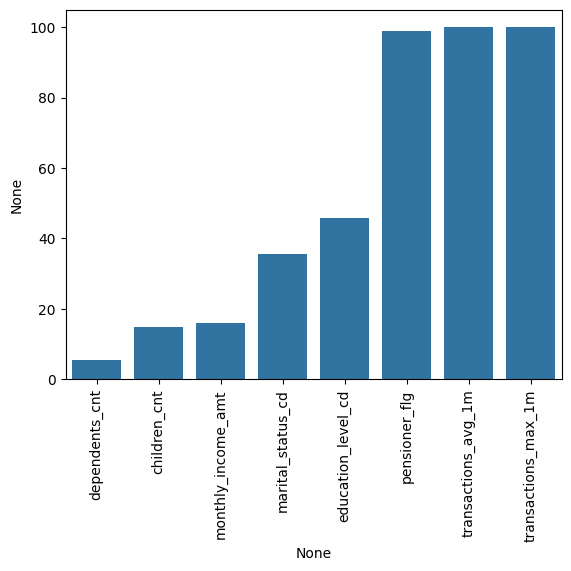

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 2.0)

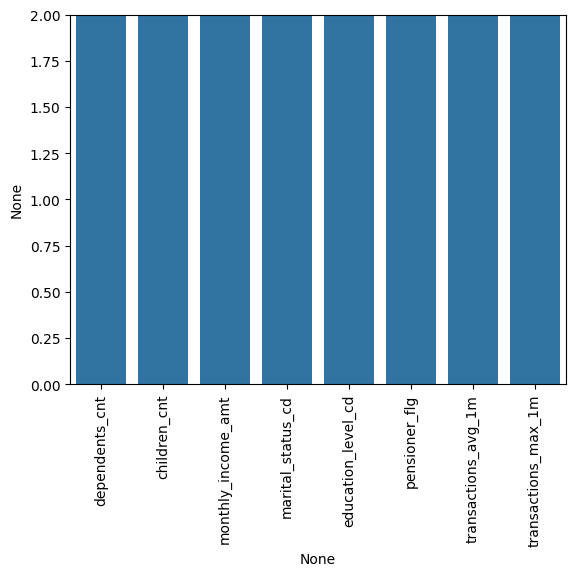

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 2%
plt.ylim(0,2)

In [ ]:
df[df['dependents_cnt'].isnull()]

,id,age,monthly_income_amt,children_cnt,dependents_cnt,transactions_avg_3m,transactions_avg_1m,transactions_max_3m,transactions_max_1m,cur_rur_balance_amt,...,fund_total_management_fee_rub_amt_sum_30d,fund_total_management_fee_rub_amt_max_30d,margin_fee_rub_amt_sum_30d,margin_fee_rub_amt_max_30d,marital_status_cd,education_level_cd,pensioner_flg,treatment,target,communication_flg
3176,865691,50,158783.0,0.0,NaN,7598,NaN,236645,NaN,721,...,5,0,0,0,MAR,GRD,NaN,1,1,1
6262,891948,58,NaN,NaN,NaN,241,NaN,1329,NaN,24,...,0,0,0,0,MAR,NaN,NaN,1,0,1
8008,906009,39,95398.0,NaN,NaN,3602,NaN,54510,NaN,5392,...,0,0,0,0,NaN,UGR,NaN,0,0,0
11752,936811,53,116367.0,0.0,NaN,1999,NaN,83984,NaN,4352,...,0,0,0,0,WID,UGR,NaN,1,0,0
15169,964771,54,58056.0,2.0,NaN,1079,NaN,28043,NaN,8942,...,78,9,37903,882,MAR,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848959,7052230,24,60003.0,NaN,NaN,9,NaN,10,NaN,0,...,0,0,0,0,NaN,NaN,NaN,1,0,1
848960,7052458,54,37717.0,NaN,NaN,740,NaN,1207,NaN,0,...,0,0,0,0,NaN,NaN,NaN,1,0,1
848961,7052564,67,NaN,NaN,NaN,149809,NaN,546049,NaN,12540,...,1,0,0,0,NaN,NaN,NaN,1,0,1
848962,7052571,60,77682.0,NaN,NaN,3139,NaN,7432,NaN,259,...,0,0,0,0,NaN,NaN,NaN,1,0,1


In [ ]:
df['dependents_cnt'] = df['dependents_cnt'].fillna(0)
df['children_cnt'] = df['children_cnt'].fillna(0)

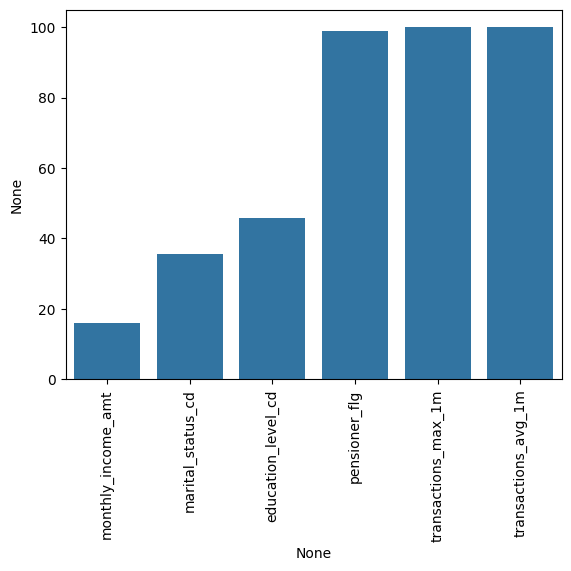

In [ ]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df = df.drop(['pensioner_flg','transactions_max_1m','transactions_avg_1m'],axis=1)

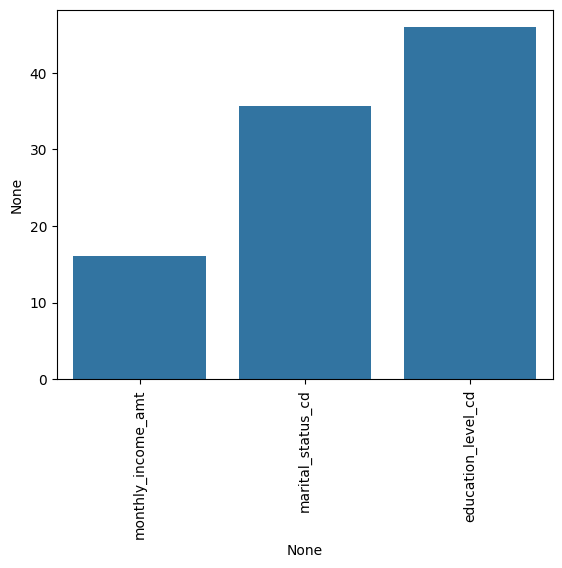

In [ ]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df['monthly_income_amt'] = df['monthly_income_amt'].fillna(np.mean(df['monthly_income_amt']))

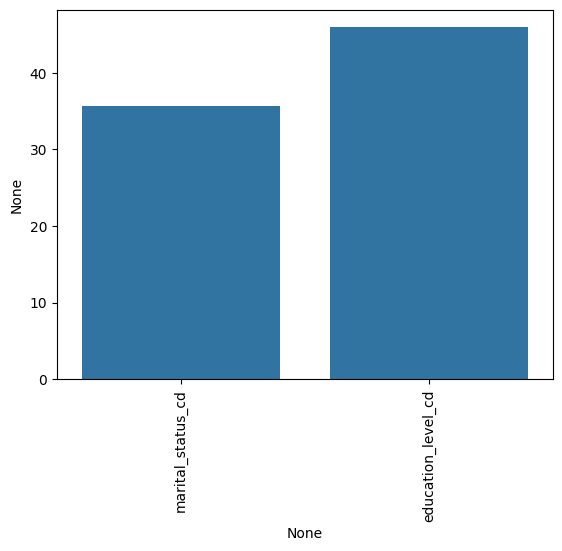

In [ ]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df['marital_status_cd'].unique()

array(['UNM', nan, 'MAR', 'DIV', 'WID', 'CIV', 'DLW'], dtype=object)

In [ ]:
df['marital_status_cd'] = df['marital_status_cd'].fillna('UNM')

In [ ]:
df['education_level_cd'].unique()

array(['GRD', nan, 'SCH', 'UGR', 'PGR', 'ACD'], dtype=object)

SCH – School → Среднее или школьное образование.

UGR – Undergraduate → Неоконченное высшее.

GRD – Graduate → Выпускник вуза.

PGR – Postgraduate → Последипломное образование (магистратура, аспирантура).

ACD – Academic Degree → Академическая степень

In [ ]:
df[df['education_level_cd'].isnull()]

,id,age,monthly_income_amt,children_cnt,dependents_cnt,transactions_avg_3m,transactions_max_3m,cur_rur_balance_amt,dep_rur_balance_amt,sav_rur_balance_amt,...,tracking_fee_rub_amt_max_30d,fund_total_management_fee_rub_amt_sum_30d,fund_total_management_fee_rub_amt_max_30d,margin_fee_rub_amt_sum_30d,margin_fee_rub_amt_max_30d,marital_status_cd,education_level_cd,treatment,target,communication_flg
3,839649,42,117637.00000,0.0,0.0,1389,54952,1003,0,471,...,0,0,0,0,0,UNM,NaN,1,0,0
10,839690,45,163094.12725,0.0,0.0,434,1894,4360,0,0,...,0,83,1,0,0,UNM,NaN,1,1,1
11,839701,76,186205.00000,0.0,0.0,17774,251694,132,2482722,50297,...,0,0,0,0,0,UNM,NaN,1,0,0
13,839732,48,163094.12725,0.0,0.0,26444,311761,343217,0,73,...,1,27,0,0,0,UNM,NaN,1,0,1
21,839775,59,1.00000,2.0,0.0,393,6804,18,0,0,...,0,0,0,0,0,WID,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848961,7052564,67,163094.12725,0.0,0.0,149809,546049,12540,619048,0,...,0,1,0,0,0,UNM,NaN,1,0,1
848962,7052571,60,77682.00000,0.0,0.0,3139,7432,259,0,0,...,0,0,0,0,0,UNM,NaN,1,0,1
848963,7052584,39,163094.12725,0.0,0.0,443,6432,339,0,0,...,0,0,0,0,0,UNM,NaN,1,1,1
848964,7052594,22,163094.12725,0.0,0.0,434,645,49,0,0,...,0,0,0,0,0,UNM,NaN,1,0,0


In [ ]:
income_by_edu = df.dropna(subset=['education_level_cd']) \
                  .groupby('education_level_cd')['monthly_income_amt'] \
                  .mean()
income_by_edu.sort_values(ascending=True)

,monthly_income_amt
education_level_cd,
UGR,130031.289403
GRD,150891.037280
ACD,169005.122180
PGR,193510.814632
SCH,206792.482589


In [ ]:
def impute_education(row):
    if pd.isnull(row['education_level_cd']):
        diffs = abs(income_by_edu - row['monthly_income_amt'])
        return diffs.idxmin()
    else:
        return row['education_level_cd']

In [ ]:
df['education_level_cd'] = df.apply(impute_education, axis=1)

In [ ]:
percent_nan = percent_missing(df)
percent_nan

,0


In [ ]:
df_encoded = pd.get_dummies(df, columns=['education_level_cd', 'marital_status_cd'], drop_first=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5]),
 [Text(0, 0.5, 'id'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'monthly_income_amt'),
  Text(0, 3.5, 'children_cnt'),
  Text(0, 4.5, 'dependents_cnt'),
  Text(0, 5.5, 'transactions_avg_3m'),
  Text(0, 6.5, 'transactions_max_3m'),
  Text(0, 7.5, 'cur_rur_balance_amt'),
  Text(0, 8.5, 'dep_rur_balance_amt'),
  Text(0, 9.5, 'sav_rur_balance_amt'),
  Text(0, 10.5, 'inv_rub_balance_amt'),
  Text(0, 11.5, 'integral_inv_rub_balance_amt'),
  Text(0, 12.5, 'in_total_amt'),
  Text(0, 13.5, 'in_invest_amt'),
  Text(0, 14.5, 'out_total_amt'),
  Text(0, 15.5, 'out_puc_amt'),
  Text(0, 16.5, 'out_uch_amt'),
  Text(0, 17.5, 'ccr_balance_amt'),
  Text(0, 18.5, 'out_puc_ccr_a

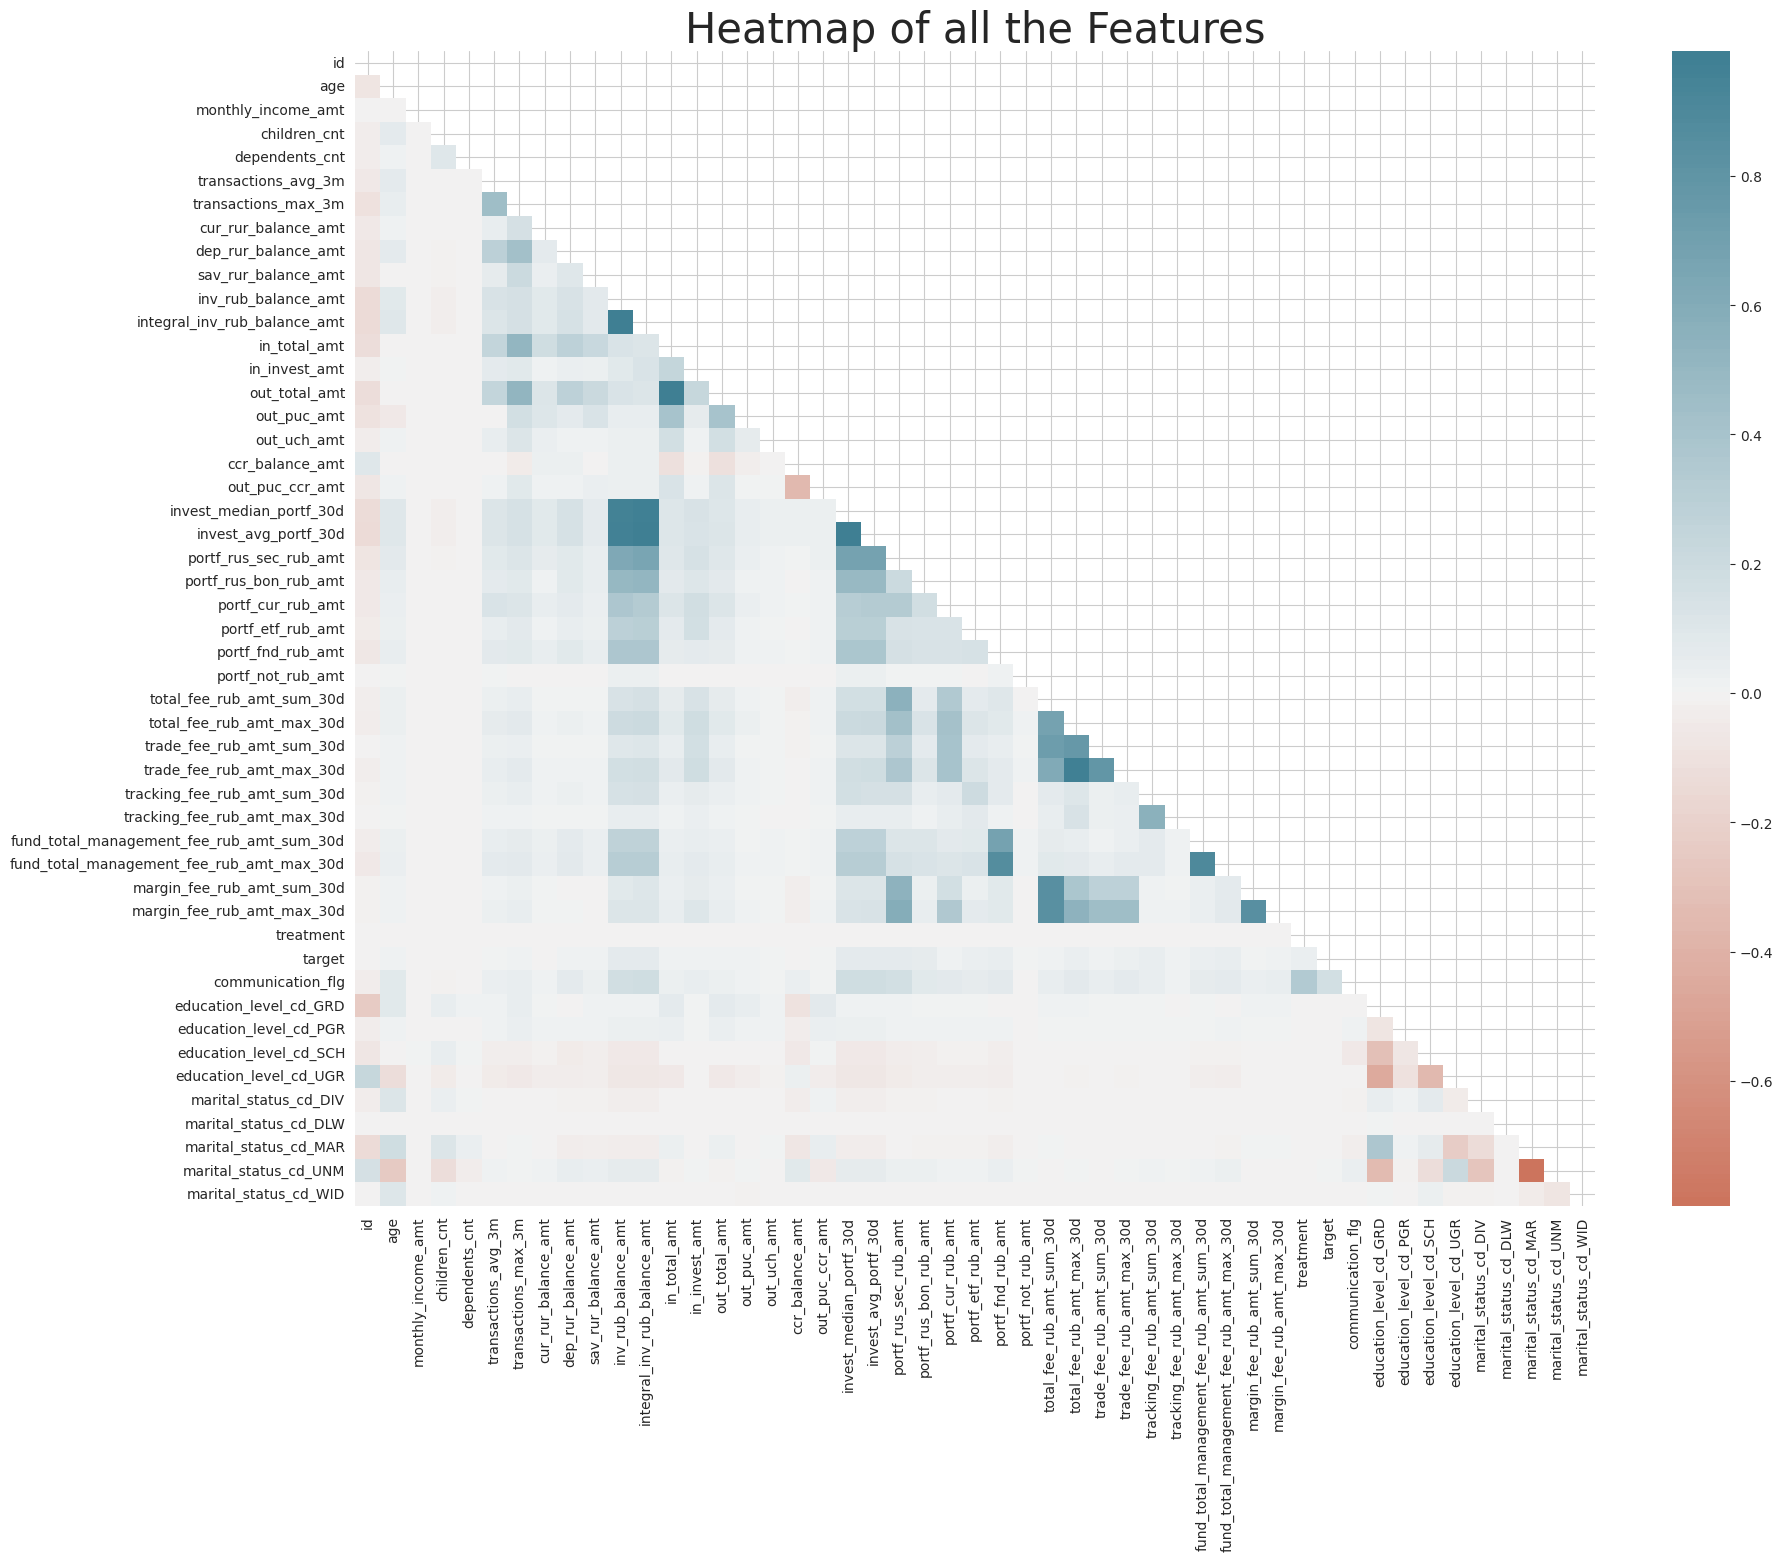

In [ ]:
import matplotlib.style as style

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))

mask = np.zeros_like(df_encoded.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_encoded.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask=mask, center = 0, )
plt.title("Heatmap of all the Features", fontsize = 30)
plt.yticks(rotation=0)

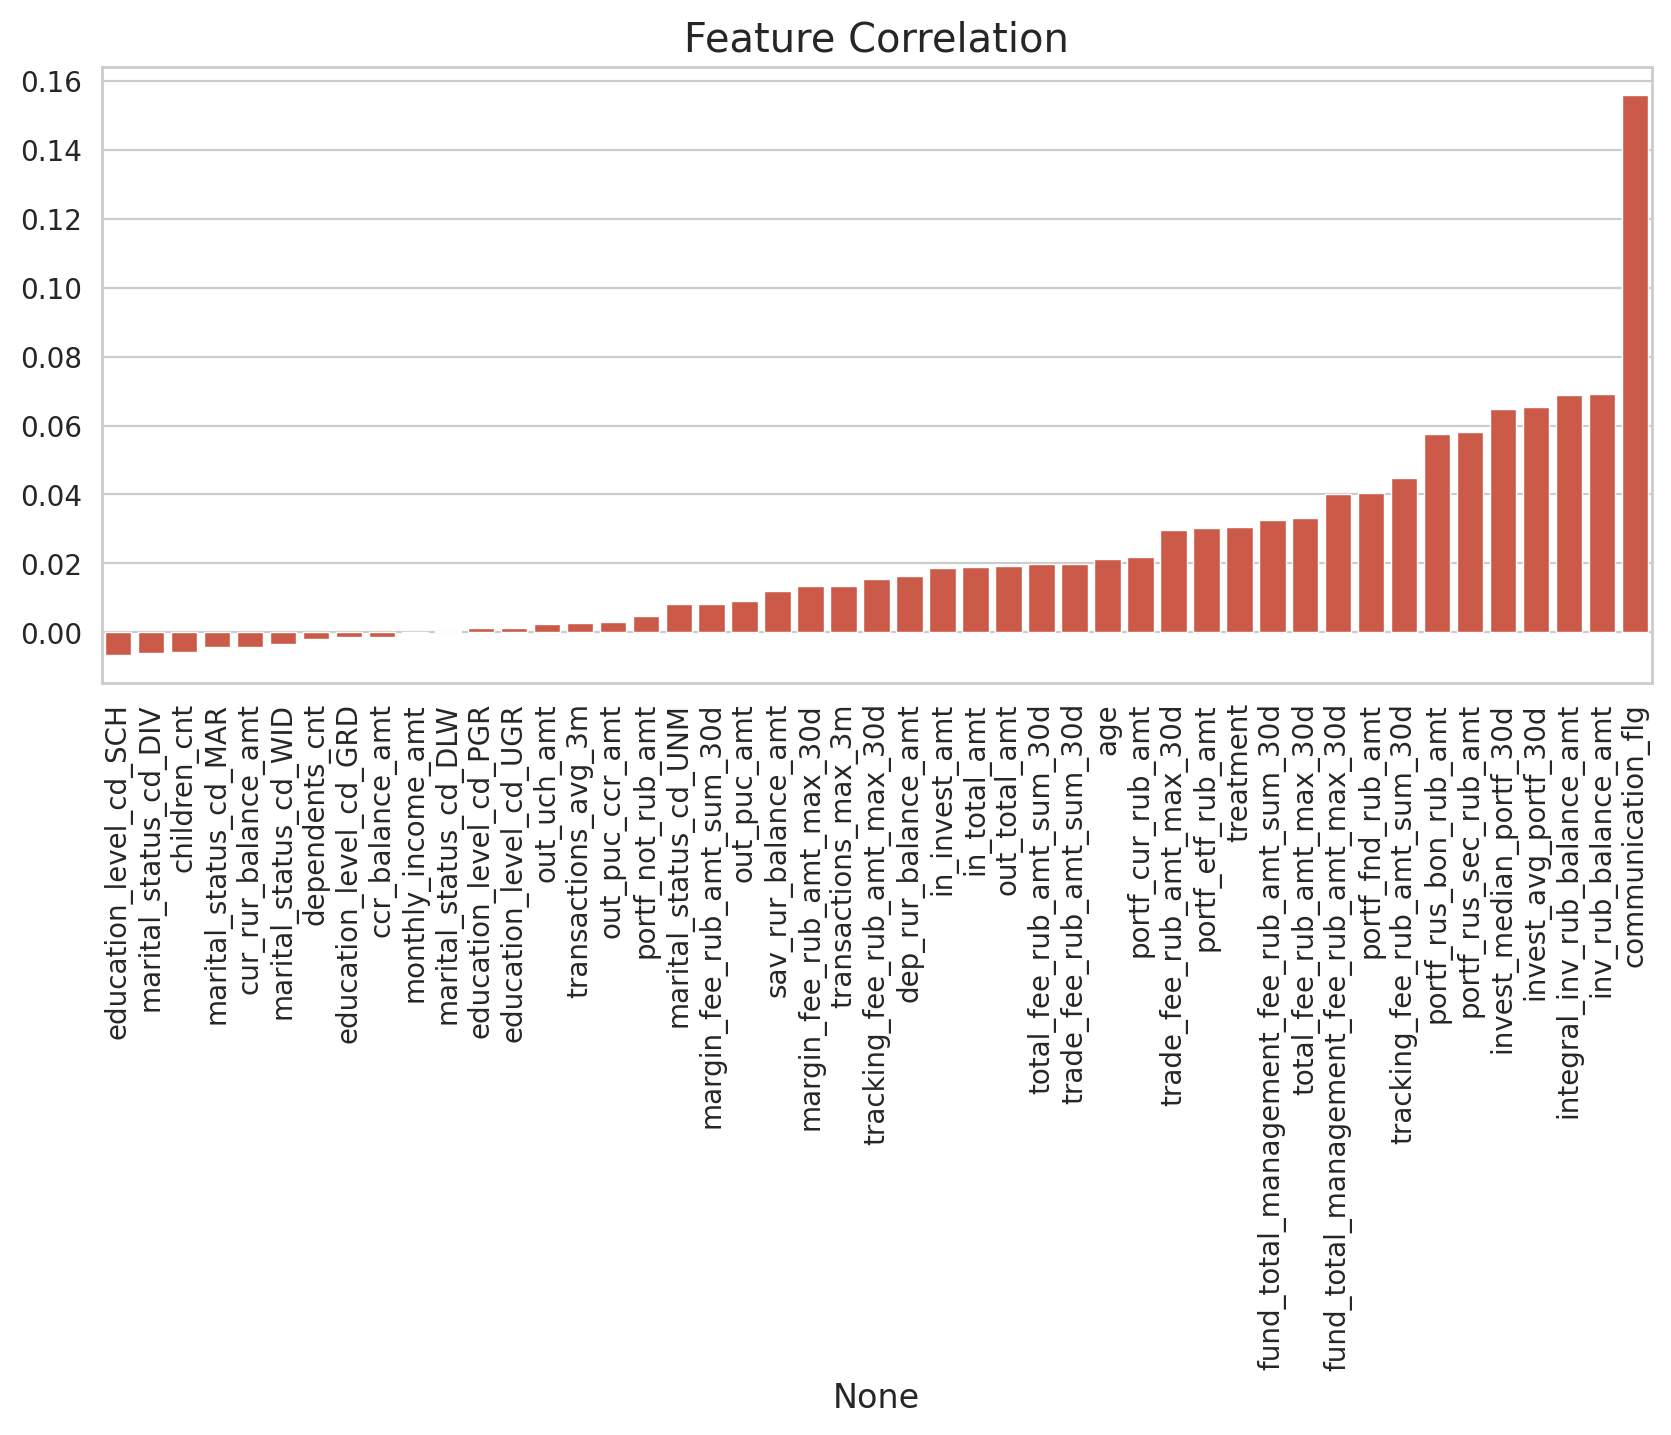

In [ ]:
corr_df = df_encoded.corr()

plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['target'].sort_values().iloc[1:-1].index,y=corr_df['target'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation")
plt.xticks(rotation=90);

<Axes: xlabel='target', ylabel='count'>

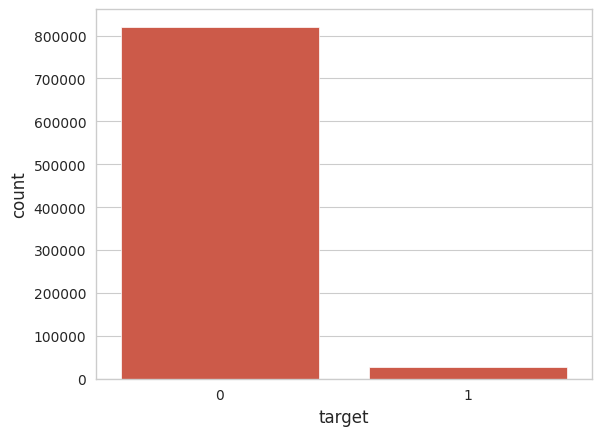

In [ ]:
sns.countplot(data=df_encoded,x='target')

<Axes: xlabel='communication_flg', ylabel='count'>

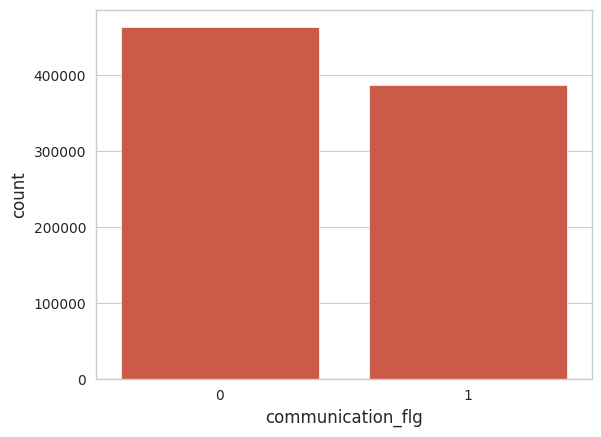

In [ ]:
sns.countplot(data=df_encoded,x='communication_flg')

<Axes: xlabel='treatment', ylabel='count'>

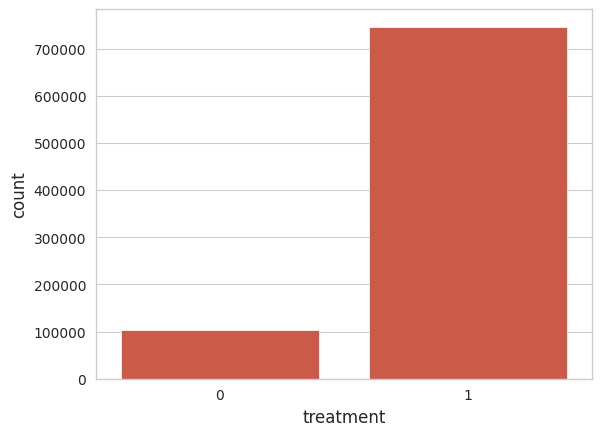

In [ ]:
sns.countplot(data=df_encoded,x='treatment')

In [ ]:
df_encoded['treatment'].value_counts()

,count
treatment,
1,746340
0,102627


Как видно из графика, у нас неравное распределение классов неравное.

In [ ]:
def share_pivot(df, index_cols):
    pivot = pd.DataFrame(df[index_cols].value_counts()).sort_index()
    pivot.columns = ['#']
    pivot['share'] = np.round(pivot['#'] / len(df), 2)
    display(pivot)

In [ ]:
share_pivot(df = df, index_cols = ['treatment', 'communication_flg', 'target'])

#  share
treatment communication_flg target               
0         0                 0       100732   0.12
                            1         1895   0.00
1         0                 0       357990   0.42
                            1         1683   0.00
          1                 0       361954   0.43
                            1        24713   0.03

In [ ]:
share_pivot(df = df, index_cols = ['treatment', 'target'])

#  share
treatment target               
0         0       100732   0.12
          1         1895   0.00
1         0       719944   0.85
          1        26396   0.03

In [ ]:
con_results_df = df_encoded.groupby('treatment').agg({'target':['mean', 'sum', 'count']})
con_results_df

target               
               mean    sum   count
treatment                         
0          0.018465   1895  102627
1          0.035367  26396  746340

In [ ]:
from statsmodels.stats.proportion import proportions_ztest


proportions_ztest(count=con_results_df[('target', 'sum')],
                  nobs=con_results_df[('target', 'count')])[1]

np.float64(5.0472267519014824e-176)

Наблюдается статзначимый эффект в пользу тестовой группы

# Train test

In [ ]:
from sklearn.model_selection import train_test_split

В силу того, что данные распределены неравномерно (было описано выше), нужно уровнять классы, так как большинство аплифт моделей легче обучаются на сбалансированных классах, в то время как на практике это встречается редко

In [ ]:
train, test  = train_test_split(df_encoded, test_size=0.2, random_state=42, stratify=df['treatment'])

In [ ]:
from imblearn.over_sampling import SMOTE

X_train = train.drop(columns=['target'])
y_train = train['target']

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<Axes: xlabel='target', ylabel='count'>

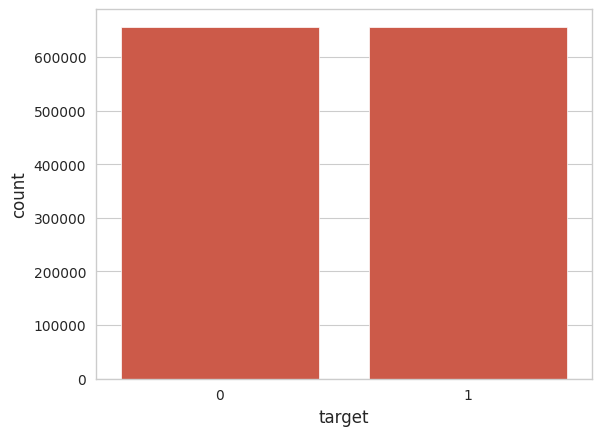

In [ ]:
sns.countplot(data=pd.DataFrame(y_train_smote),x='target')

In [ ]:
df_combined_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

In [ ]:
share_pivot(df = df_combined_smote, index_cols = ['treatment', 'target'])

#  share
treatment target               
0         0        80592   0.06
          1        80423   0.06
1         0       575917   0.44
          1       576086   0.44

Используя SMOTE, получилось сбалансировать классы

Для того, чтобы быть более точным в Аплифт моделировании стоит расписать, какие клиенты у нас:
- Не беспокоить - человек, который будет реагировать негативно, если с ним прокоммуницировать
- Потерянный - человек, который не совершит целевое действие независимо от коммуникаций
- Лояльный - человек, который будет реагировать положительно, несмотря ни на что
- Убеждаемый - это человек, который положительно реагирует на предложение, но при его отсутствии не выполнил бы целевого действия

# Metalearners

### Data

In [ ]:
X_train = X_train_smote.drop(columns = ['treatment'])
treatment_train = X_train_smote['treatment']
y_train = y_train_smote
X_test = test.drop(columns = ['treatment', 'target'])
treatment_test = test['treatment']
y_test = test['target']

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
def calculate_uplift(y_test, uplift_effect, treatment_test):
  upliftk = uplift_at_k(
    y_true = y_test,
    uplift = uplift_effect,
    treatment = treatment_test,
    strategy='by_group',
    k = 0.3
  )

  upliftk_all = uplift_at_k(
      y_true = y_test,
      uplift = uplift_effect,
      treatment = treatment_test,
      strategy = 'overall',
  )

  qini_coef = qini_auc_score(
      y_true = y_test,
      uplift = uplift_effect,
      treatment = treatment_test
  )

  uplift_auc = uplift_auc_score(
      y_true = y_test,
      uplift = uplift_effect,
      treatment = treatment_test
  )

  print(f'uplift at top 30% by group: {upliftk:.3f} by overall: {upliftk_all:.3f}\n',
            f'AUUC by group: {uplift_auc:.3f}\n',
            f'AUQC by group: {qini_coef:.3f}\n')

  return upliftk

## S-Leaner

In [ ]:
estimator = CatBoostClassifier()

Catboost = SoloModel(estimator=estimator)
Catboost.fit(X_train, treatment_train, y_train)
uplift_effect = Catboost.predict(X_test)

Learning rate set to 0.221022
0:	learn: 0.3078834	total: 653ms	remaining: 10m 52s
1:	learn: 0.2412733	total: 1.1s	remaining: 9m 10s
2:	learn: 0.2249833	total: 1.56s	remaining: 8m 37s
3:	learn: 0.2181980	total: 1.99s	remaining: 8m 16s
4:	learn: 0.2145792	total: 2.43s	remaining: 8m 4s
5:	learn: 0.2125176	total: 2.85s	remaining: 7m 52s
6:	learn: 0.2113134	total: 3.27s	remaining: 7m 43s
7:	learn: 0.2104666	total: 3.67s	remaining: 7m 35s
8:	learn: 0.2098044	total: 4.09s	remaining: 7m 30s
9:	learn: 0.2094011	total: 4.46s	remaining: 7m 21s
10:	learn: 0.2090469	total: 4.88s	remaining: 7m 18s
11:	learn: 0.2087528	total: 5.31s	remaining: 7m 17s
12:	learn: 0.2085263	total: 5.65s	remaining: 7m 9s
13:	learn: 0.2083480	total: 6.04s	remaining: 7m 5s
14:	learn: 0.2081619	total: 6.41s	remaining: 7m 1s
15:	learn: 0.2079611	total: 6.82s	remaining: 6m 59s
16:	learn: 0.2078295	total: 7.22s	remaining: 6m 57s
17:	learn: 0.2076243	total: 7.66s	remaining: 6m 57s
18:	learn: 0.2075052	total: 8.25s	remaining: 7m 

In [ ]:
uplift_s_catboost = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.058 by overall: 0.057
 AUUC by group: 0.061
 AUQC by group: 0.195



In [ ]:
estimator = LGBMClassifier(
    random_state = 1,
    n_jobs = -1,
)

LGBMC = SoloModel(estimator=estimator)
LGBMC.fit(X_train, treatment_train, y_train)
uplift_effect = LGBMC.predict(X_test)

[LightGBM] [Info] Number of positive: 1152003, number of negative: 161015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.938421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8738
[LightGBM] [Info] Number of data points in the train set: 1313018, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.877370 -> initscore=1.967760
[LightGBM] [Info] Start training from score 1.967760


In [ ]:
uplift_s_lgbm = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.017 by overall: 0.016
 AUUC by group: 0.009
 AUQC by group: 0.040



In [ ]:
estimator = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    eval_metric = 'logloss'
)

XGBC = SoloModel(estimator=estimator)
XGBC.fit(X_train, treatment_train, y_train)
uplift_effect = XGBC.predict(X_test)

In [ ]:
uplift_s_XGB = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.025 by overall: 0.023
 AUUC by group: 0.024
 AUQC by group: 0.085



## T-Leaner

In [ ]:
estimator = CatBoostClassifier()

tm_ctrl = TwoModels(
    estimator_trmnt=clone(estimator),
    estimator_ctrl=clone(estimator),
    method='ddr_control'
)

tm_ctrl.fit(X_train, treatment_train, y_train)
uplift_effect = tm_ctrl.predict(X_test)

Learning rate set to 0.164398
0:	learn: 0.4283299	total: 580ms	remaining: 9m 39s
1:	learn: 0.3460440	total: 850ms	remaining: 7m 3s
2:	learn: 0.3132085	total: 1.09s	remaining: 6m 2s
3:	learn: 0.2969141	total: 1.5s	remaining: 6m 13s
4:	learn: 0.2875065	total: 1.91s	remaining: 6m 19s
5:	learn: 0.2812661	total: 2.32s	remaining: 6m 24s
6:	learn: 0.2771439	total: 2.64s	remaining: 6m 15s
7:	learn: 0.2743980	total: 2.96s	remaining: 6m 7s
8:	learn: 0.2723503	total: 3.23s	remaining: 5m 55s
9:	learn: 0.2709850	total: 3.57s	remaining: 5m 53s
10:	learn: 0.2699636	total: 4.03s	remaining: 6m 2s
11:	learn: 0.2692188	total: 4.41s	remaining: 6m 2s
12:	learn: 0.2686995	total: 4.79s	remaining: 6m 3s
13:	learn: 0.2682746	total: 5.05s	remaining: 5m 56s
14:	learn: 0.2679581	total: 5.41s	remaining: 5m 55s
15:	learn: 0.2676811	total: 5.8s	remaining: 5m 56s
16:	learn: 0.2674804	total: 6.07s	remaining: 5m 50s
17:	learn: 0.2673357	total: 6.36s	remaining: 5m 46s
18:	learn: 0.2671390	total: 6.74s	remaining: 5m 47s


In [ ]:
uplift_t_catboost = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.018 by overall: 0.018
 AUUC by group: 0.030
 AUQC by group: 0.103



In [ ]:
estimator = LGBMClassifier(
    random_state = 1,
    n_jobs = -1,
)

LQBM = TwoModels(clone(estimator), clone(estimator))
LQBM.fit(X_train, treatment_train, y_train)
uplift_effect = LQBM.predict(X_test)

[LightGBM] [Info] Number of positive: 575917, number of negative: 80592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.438248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8340
[LightGBM] [Info] Number of data points in the train set: 656509, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.877242 -> initscore=1.966564
[LightGBM] [Info] Start training from score 1.966564
[LightGBM] [Info] Number of positive: 576086, number of negative: 80423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.166364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8754
[LightGBM] [Info] Number of data points in the train set: 656509, number of used features: 47
[LightGBM] [Info

In [ ]:
uplift_t_lgbm = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.023 by overall: 0.021
 AUUC by group: 0.021
 AUQC by group: 0.076



In [ ]:
estimator = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    eval_metric = 'logloss'
)

XGBC = TwoModels(clone(estimator), clone(estimator))
XGBC.fit(X_train, treatment_train, y_train)
uplift_effect = XGBC.predict(X_test)

In [ ]:
uplift_t_xgb = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.020 by overall: 0.020
 AUUC by group: 0.030
 AUQC by group: 0.103



## Дерево решений

In [ ]:
from causalml.inference.tree import UpliftTreeClassifier

In [ ]:
treat_vals_dict = {'0':'control', '1':'treated'}
treatment_train_str = treatment_train.astype('str').map(treat_vals_dict)
treatment_test_str = treatment_test.astype('str').map(treat_vals_dict)

In [ ]:
tree_uplift = UpliftTreeClassifier(control_name='control', random_state = 1)
tree_uplift.fit(X_train.values, treatment_train_str.values, y_train.values)
trealment_0_pred = tree_uplift.predict(X_test.values)[:, 0]
trealment_1_pred = tree_uplift.predict(X_test.values)[:, 1]
uplift_effect = trealment_1_pred - trealment_0_pred

In [ ]:
uplift_uplift_tree = calculate_uplift(y_test, uplift_effect, treatment_test)

uplift at top 30% by group: 0.041 by overall: 0.041
 AUUC by group: 0.051
 AUQC by group: 0.158



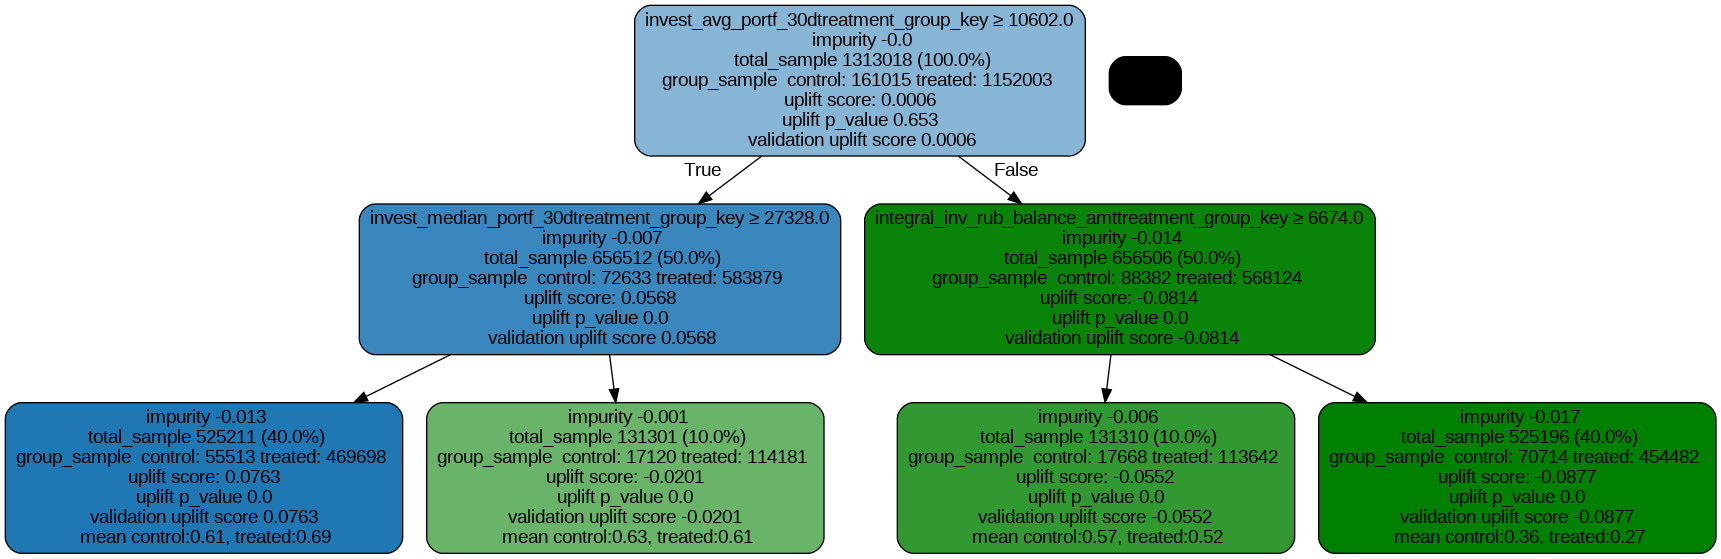

In [ ]:
from causalml.inference.tree import uplift_tree_plot
from IPython.display import Image

graph = uplift_tree_plot(tree_uplift.fitted_uplift_tree, X_train.columns)
Image(graph.create_png())

# Поиск гиперпараметров

Выбор пал на S-Learner - Catboost

In [ ]:
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostClassifier(**params, silent=True)

    Catboost = SoloModel(estimator=model)
    Catboost.fit(X_train, treatment_train, y_train)
    uplift_effect = Catboost.predict(X_test)
    uplift_s_catboost = calculate_uplift(y_test, uplift_effect, treatment_test)

    return uplift_s_catboost

# Создание и запуск исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Уменьшенное количество испытаний

# Вывод лучших гиперпараметров
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

[I 2025-06-18 09:06:51,009] A new study created in memory with name: no-name-c7df49d3-64eb-40d0-bb67-d40fc3e67f4b
[I 2025-06-18 09:12:26,291] Trial 0 finished with value: 0.04942601379722771 and parameters: {'learning_rate': 0.05265638029187002, 'depth': 2, 'subsample': 0.961360459249641, 'colsample_bylevel': 0.7595116945897358, 'min_data_in_leaf': 98}. Best is trial 0 with value: 0.04942601379722771.


uplift at top 30% by group: 0.049 by overall: 0.035
 AUUC by group: 0.043
 AUQC by group: 0.144



[I 2025-06-18 09:18:20,085] Trial 1 finished with value: 0.046096288838660675 and parameters: {'learning_rate': 0.008565691201782313, 'depth': 3, 'subsample': 0.8983703763462947, 'colsample_bylevel': 0.5944968374560073, 'min_data_in_leaf': 29}. Best is trial 0 with value: 0.04942601379722771.


uplift at top 30% by group: 0.046 by overall: 0.041
 AUUC by group: 0.041
 AUQC by group: 0.140



/usr/local/lib/python3.11/dist-packages/sklift/metrics/metrics.py:448: RuntimeWarning: Mean of empty slice.
  score_ctrl = y_true[order][:n_size][treatment[order][:n_size] == 0].mean()
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
[I 2025-06-18 09:21:45,562] Trial 2 finished with value: 0.025940858391807115 and parameters: {'learning_rate': 0.004793124744108927, 'depth': 1, 'subsample': 0.4604281720919649, 'colsample_bylevel': 0.541071039021638, 'min_data_in_leaf': 65}. Best is trial 0 with value: 0.04942601379722771.


uplift at top 30% by group: 0.026 by overall: nan
 AUUC by group: 0.132
 AUQC by group: 0.470



[I 2025-06-18 09:27:30,314] Trial 3 finished with value: 0.056685774634738194 and parameters: {'learning_rate': 0.07697911485412158, 'depth': 6, 'subsample': 0.38990347003497977, 'colsample_bylevel': 0.6196928597756166, 'min_data_in_leaf': 11}. Best is trial 3 with value: 0.056685774634738194.


uplift at top 30% by group: 0.057 by overall: 0.051
 AUUC by group: 0.060
 AUQC by group: 0.194



[I 2025-06-18 09:31:56,748] Trial 4 finished with value: 0.049385101312442045 and parameters: {'learning_rate': 0.0013391481135075563, 'depth': 4, 'subsample': 0.2554441883126374, 'colsample_bylevel': 0.7265079450635642, 'min_data_in_leaf': 90}. Best is trial 3 with value: 0.056685774634738194.


uplift at top 30% by group: 0.049 by overall: 0.046
 AUUC by group: 0.051
 AUQC by group: 0.166



[I 2025-06-18 09:35:32,538] Trial 5 finished with value: 0.04987036763131874 and parameters: {'learning_rate': 0.025908517571622842, 'depth': 5, 'subsample': 0.06164569779669022, 'colsample_bylevel': 0.3006395187826041, 'min_data_in_leaf': 38}. Best is trial 3 with value: 0.056685774634738194.


uplift at top 30% by group: 0.050 by overall: 0.043
 AUUC by group: 0.049
 AUQC by group: 0.162



[I 2025-06-18 09:44:49,111] Trial 6 finished with value: 0.05540245734601437 and parameters: {'learning_rate': 0.00428152554652521, 'depth': 8, 'subsample': 0.703331570759227, 'colsample_bylevel': 0.5002274883419706, 'min_data_in_leaf': 39}. Best is trial 3 with value: 0.056685774634738194.


uplift at top 30% by group: 0.055 by overall: 0.049
 AUUC by group: 0.058
 AUQC by group: 0.188



[I 2025-06-18 09:50:41,018] Trial 7 finished with value: 0.053439278292162 and parameters: {'learning_rate': 0.0019518544456913114, 'depth': 8, 'subsample': 0.21996855464941617, 'colsample_bylevel': 0.5651934712297285, 'min_data_in_leaf': 51}. Best is trial 3 with value: 0.056685774634738194.


uplift at top 30% by group: 0.053 by overall: 0.048
 AUUC by group: 0.057
 AUQC by group: 0.183



[I 2025-06-18 09:59:21,524] Trial 8 finished with value: 0.05837921056749171 and parameters: {'learning_rate': 0.07857393867726632, 'depth': 10, 'subsample': 0.41425979240267924, 'colsample_bylevel': 0.3312515782699622, 'min_data_in_leaf': 48}. Best is trial 8 with value: 0.05837921056749171.


uplift at top 30% by group: 0.058 by overall: 0.059
 AUUC by group: 0.064
 AUQC by group: 0.207



[I 2025-06-18 10:03:18,586] Trial 9 finished with value: 0.04657134517130761 and parameters: {'learning_rate': 0.004063221574465286, 'depth': 3, 'subsample': 0.30175125248693174, 'colsample_bylevel': 0.968191227095214, 'min_data_in_leaf': 91}. Best is trial 8 with value: 0.05837921056749171.


uplift at top 30% by group: 0.047 by overall: 0.040
 AUUC by group: 0.039
 AUQC by group: 0.143



[I 2025-06-18 10:08:55,664] Trial 10 finished with value: 0.053699319206097586 and parameters: {'learning_rate': 0.02555557284158463, 'depth': 10, 'subsample': 0.6298123172975119, 'colsample_bylevel': 0.07363872461422744, 'min_data_in_leaf': 65}. Best is trial 8 with value: 0.05837921056749171.


uplift at top 30% by group: 0.054 by overall: 0.047
 AUUC by group: 0.056
 AUQC by group: 0.182



[I 2025-06-18 10:15:04,389] Trial 11 finished with value: 0.057386201452059526 and parameters: {'learning_rate': 0.07363427271981317, 'depth': 7, 'subsample': 0.45470752944560056, 'colsample_bylevel': 0.34851364960501946, 'min_data_in_leaf': 4}. Best is trial 8 with value: 0.05837921056749171.


uplift at top 30% by group: 0.057 by overall: 0.055
 AUUC by group: 0.063
 AUQC by group: 0.203



[I 2025-06-18 10:24:42,019] Trial 12 finished with value: 0.060541388237501034 and parameters: {'learning_rate': 0.09420955529215877, 'depth': 10, 'subsample': 0.5956872134741609, 'colsample_bylevel': 0.2853756209291065, 'min_data_in_leaf': 5}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.061 by overall: 0.061
 AUUC by group: 0.070
 AUQC by group: 0.223



[I 2025-06-18 10:32:45,517] Trial 13 finished with value: 0.05878903905205483 and parameters: {'learning_rate': 0.02952436527060891, 'depth': 10, 'subsample': 0.6360003622306621, 'colsample_bylevel': 0.17541260753121185, 'min_data_in_leaf': 19}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.059 by overall: 0.056
 AUUC by group: 0.070
 AUQC by group: 0.224



[I 2025-06-18 10:39:59,746] Trial 14 finished with value: 0.05440378649399083 and parameters: {'learning_rate': 0.031509202296703724, 'depth': 9, 'subsample': 0.7426574513008193, 'colsample_bylevel': 0.10423321190331122, 'min_data_in_leaf': 17}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.054 by overall: 0.048
 AUUC by group: 0.055
 AUQC by group: 0.178



[I 2025-06-18 10:48:07,998] Trial 15 finished with value: 0.0579118724766554 and parameters: {'learning_rate': 0.01414824722011766, 'depth': 10, 'subsample': 0.5719977738607112, 'colsample_bylevel': 0.21486113434436424, 'min_data_in_leaf': 1}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.058 by overall: 0.051
 AUUC by group: 0.064
 AUQC by group: 0.204



[I 2025-06-18 10:55:54,483] Trial 16 finished with value: 0.05771705941080364 and parameters: {'learning_rate': 0.04295407339865982, 'depth': 8, 'subsample': 0.8104688250659061, 'colsample_bylevel': 0.20834755517899212, 'min_data_in_leaf': 22}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.058 by overall: 0.052
 AUUC by group: 0.061
 AUQC by group: 0.197



[I 2025-06-18 11:05:35,093] Trial 17 finished with value: 0.05866709953623087 and parameters: {'learning_rate': 0.013983980317777011, 'depth': 9, 'subsample': 0.6292766656403311, 'colsample_bylevel': 0.411737373673096, 'min_data_in_leaf': 26}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.059 by overall: 0.052
 AUUC by group: 0.063
 AUQC by group: 0.202



[I 2025-06-18 11:11:47,015] Trial 18 finished with value: 0.05188033852614804 and parameters: {'learning_rate': 0.0936317289108691, 'depth': 6, 'subsample': 0.8503632519093192, 'colsample_bylevel': 0.1835651464886433, 'min_data_in_leaf': 13}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.052 by overall: 0.045
 AUUC by group: 0.045
 AUQC by group: 0.148



[I 2025-06-18 11:20:54,519] Trial 19 finished with value: 0.058537369238729646 and parameters: {'learning_rate': 0.044894171836772974, 'depth': 9, 'subsample': 0.5497648606274556, 'colsample_bylevel': 0.44406409475217073, 'min_data_in_leaf': 1}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.059 by overall: 0.057
 AUUC by group: 0.065
 AUQC by group: 0.208



[I 2025-06-18 11:25:23,978] Trial 20 finished with value: 0.0498805776175485 and parameters: {'learning_rate': 0.01706782700771218, 'depth': 7, 'subsample': 0.7121645381740956, 'colsample_bylevel': 0.05055046232923935, 'min_data_in_leaf': 33}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.050 by overall: 0.039
 AUUC by group: 0.046
 AUQC by group: 0.154



[I 2025-06-18 11:34:31,354] Trial 21 finished with value: 0.057040875416913814 and parameters: {'learning_rate': 0.008371793717259261, 'depth': 9, 'subsample': 0.6264814512815442, 'colsample_bylevel': 0.3800680778040492, 'min_data_in_leaf': 23}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.057 by overall: 0.049
 AUUC by group: 0.059
 AUQC by group: 0.191



[I 2025-06-18 11:43:40,454] Trial 22 finished with value: 0.057704792919354604 and parameters: {'learning_rate': 0.013840528420062026, 'depth': 10, 'subsample': 0.6358558466296371, 'colsample_bylevel': 0.23738492466849198, 'min_data_in_leaf': 11}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.058 by overall: 0.051
 AUUC by group: 0.064
 AUQC by group: 0.204



[I 2025-06-18 11:52:36,132] Trial 23 finished with value: 0.05918483469941619 and parameters: {'learning_rate': 0.020053407932709728, 'depth': 9, 'subsample': 0.5297128211444712, 'colsample_bylevel': 0.411235993243537, 'min_data_in_leaf': 25}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.059 by overall: 0.053
 AUUC by group: 0.064
 AUQC by group: 0.206



[I 2025-06-18 11:58:44,759] Trial 24 finished with value: 0.05572941991391984 and parameters: {'learning_rate': 0.021164488371704922, 'depth': 7, 'subsample': 0.5311414820132623, 'colsample_bylevel': 0.2810900612073731, 'min_data_in_leaf': 18}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.056 by overall: 0.048
 AUUC by group: 0.058
 AUQC by group: 0.187



[I 2025-06-18 12:04:53,231] Trial 25 finished with value: 0.058939261861882204 and parameters: {'learning_rate': 0.03890886593591086, 'depth': 10, 'subsample': 0.3579728794625937, 'colsample_bylevel': 0.14092251230038877, 'min_data_in_leaf': 46}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.059 by overall: 0.056
 AUUC by group: 0.067
 AUQC by group: 0.214



[I 2025-06-18 12:10:10,609] Trial 26 finished with value: 0.053226391918536564 and parameters: {'learning_rate': 0.0649370059316455, 'depth': 8, 'subsample': 0.3542152156151646, 'colsample_bylevel': 0.11715356901468091, 'min_data_in_leaf': 51}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.053 by overall: 0.047
 AUUC by group: 0.051
 AUQC by group: 0.168



[I 2025-06-18 12:16:15,100] Trial 27 finished with value: 0.05784083781224695 and parameters: {'learning_rate': 0.03760259413610476, 'depth': 9, 'subsample': 0.10016907193107166, 'colsample_bylevel': 0.46479492154273344, 'min_data_in_leaf': 62}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.058 by overall: 0.051
 AUUC by group: 0.060
 AUQC by group: 0.194



[I 2025-06-18 12:22:41,388] Trial 28 finished with value: 0.05987115613966913 and parameters: {'learning_rate': 0.055894727406830075, 'depth': 10, 'subsample': 0.18122174662344934, 'colsample_bylevel': 0.2709308199040865, 'min_data_in_leaf': 41}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.060 by overall: 0.058
 AUUC by group: 0.066
 AUQC by group: 0.212



[I 2025-06-18 12:28:24,657] Trial 29 finished with value: 0.05754854567360266 and parameters: {'learning_rate': 0.05577459526513201, 'depth': 9, 'subsample': 0.13752656133967786, 'colsample_bylevel': 0.2703716494589694, 'min_data_in_leaf': 34}. Best is trial 12 with value: 0.060541388237501034.


uplift at top 30% by group: 0.058 by overall: 0.054
 AUUC by group: 0.062
 AUQC by group: 0.199

Best hyperparameters:  {'learning_rate': 0.09420955529215877, 'depth': 10, 'subsample': 0.5956872134741609, 'colsample_bylevel': 0.2853756209291065, 'min_data_in_leaf': 5}
Best score:  0.060541388237501034


Лучшие параметры:
- 'learning_rate': 0.09420955529215877,
- 'depth': 10,
- 'subsample': 0.5956872134741609,
- 'colsample_bylevel': 0.2853756209291065,
- 'min_data_in_leaf': 5

# Обучаем финальную модель с подобранными гиперпараметрами

In [ ]:
estimator = CatBoostClassifier(learning_rate=0.09420955529215877,
                               depth=10,
                               subsample=0.5956872134741609,
                               colsample_bylevel= 0.2853756209291065,
                               min_data_in_leaf=5)

In [ ]:
model = SoloModel(estimator=estimator)

In [ ]:
model.fit(X_train, treatment_train, y_train)

0:	learn: 0.4717286	total: 1.01s	remaining: 16m 45s
1:	learn: 0.3544780	total: 1.96s	remaining: 16m 16s
2:	learn: 0.2950829	total: 2.58s	remaining: 14m 18s
3:	learn: 0.2629365	total: 3.1s	remaining: 12m 51s
4:	learn: 0.2459860	total: 3.67s	remaining: 12m 10s
5:	learn: 0.2353281	total: 4.28s	remaining: 11m 49s
6:	learn: 0.2283245	total: 4.82s	remaining: 11m 24s
7:	learn: 0.2233450	total: 5.33s	remaining: 11m
8:	learn: 0.2196980	total: 5.79s	remaining: 10m 37s
9:	learn: 0.2170387	total: 6.24s	remaining: 10m 17s
10:	learn: 0.2148621	total: 6.74s	remaining: 10m 5s
11:	learn: 0.2130775	total: 7.2s	remaining: 9m 52s
12:	learn: 0.2117157	total: 7.71s	remaining: 9m 45s
13:	learn: 0.2104580	total: 8.18s	remaining: 9m 35s
14:	learn: 0.2094222	total: 8.65s	remaining: 9m 28s
15:	learn: 0.2085360	total: 9.14s	remaining: 9m 22s
16:	learn: 0.2078139	total: 9.62s	remaining: 9m 16s
17:	learn: 0.2072733	total: 10.1s	remaining: 9m 10s
18:	learn: 0.2067489	total: 10.6s	remaining: 9m 5s
19:	learn: 0.206263

,estimator,<catboost.cor...x796639227310>
,method,'dummy'


In [ ]:
uplift_preds = model.predict(X_test)
uplift_final = calculate_uplift(y_test, uplift_preds, treatment_test)

uplift at top 30% by group: 0.061 by overall: 0.061
 AUUC by group: 0.070
 AUQC by group: 0.223



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, uplift_preds)

In [ ]:
roc_auc = roc_auc_score(y_test, uplift_preds)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.7369142560058894


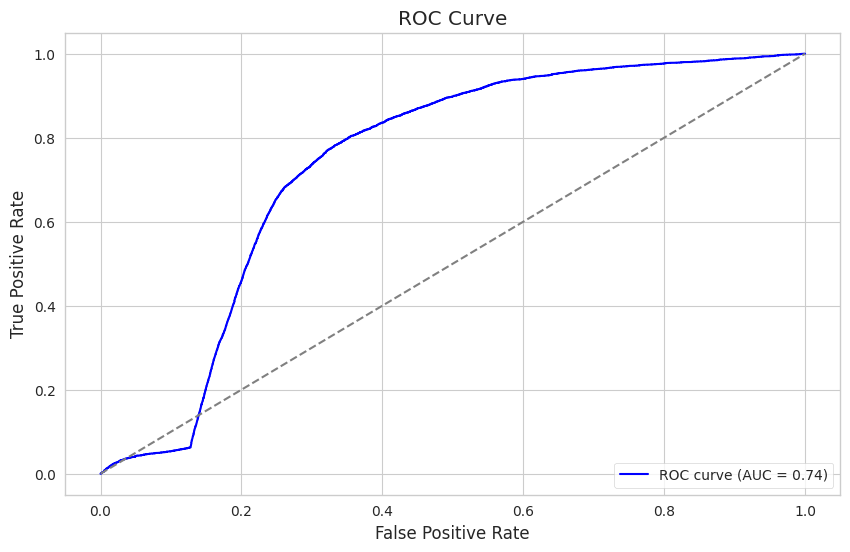

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
model.estimator.get_feature_importance()

array([2.73095622e+00, 8.25833400e-01, 1.40404405e+00, 2.40393552e-01,
       1.30847144e-02, 1.06678206e+00, 1.32320806e+00, 7.92069049e-01,
       6.97983405e-01, 7.47016452e-01, 8.76447510e-01, 8.31468602e-01,
       1.18916335e+00, 7.36515194e-01, 1.03131462e+00, 7.45419159e-01,
       8.27756018e-01, 7.48278705e-01, 5.20624738e-01, 7.68317361e-01,
       7.27861902e-01, 8.40742532e-01, 4.79486520e-01, 1.05089982e+00,
       4.92671501e-01, 1.27692015e+00, 8.94073681e-04, 4.09167870e-01,
       3.69786664e-01, 8.66816649e-01, 4.61845794e-01, 3.32597146e-01,
       1.58231281e-01, 3.28852550e-01, 5.45035418e-02, 1.03134630e-01,
       2.43349547e-01, 7.03438201e+01, 2.33977813e-01, 1.31777069e-01,
       3.83193113e-01, 2.28126235e-01, 2.49222883e-01, 1.04294273e-05,
       2.76830582e-01, 1.76231561e-01, 1.41757326e-02, 1.64819611e+00])